In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import percentile
sns.set_style("whitegrid")
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV, cross_val_score,StratifiedKFold, learning_curve

## Importing the dataset 

In [2]:
df = pd.read_csv('D:\SALARY.csv',encoding='cp1252')
df

,age,workclass,education,marital-status,occupation,sex,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Never-married,Android Developer - Intern,Male,40,Uganda,<=50K
1,50,self-emp,Bachelors,Married-civ-spouse,Android Developer - Contractor,Male,13,Uganda,<=50K
2,38,Private,HS-grad,Divorced,Android Developer Contractor,Male,40,Uganda,<=50K
3,53,Private,11th,Married-civ-spouse,Senior Android Developer,Male,40,Uganda,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Android Software Engineer,Female,40,Tanzania,<=50K
...,...,...,...,...,...,...,...,...,...
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Male,40,Uganda,>50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,Female,40,Uganda,<=50K
32559,22,Private,HS-grad,Never-married,Adm-clerical,Male,20,Uganda,<=50K
32560,52,Self-emp-inc,HS-grad,Married-civ-spouse,Exec-managerial,Female,40,Uganda,>50K


## Explore and clean the data
The process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate or incomplete data from the dataset

In [3]:
df.select_dtypes(np.number)

,age,hours-per-week
0,39,40
1,50,13
2,38,40
3,53,40
4,28,40
...,...,...
32557,40,40
32558,58,40
32559,22,20
32560,52,40


In [4]:
df.select_dtypes(np.object)

,workclass,education,marital-status,occupation,sex,native-country,salary
0,State-gov,Bachelors,Never-married,Android Developer - Intern,Male,Uganda,<=50K
1,self-emp,Bachelors,Married-civ-spouse,Android Developer - Contractor,Male,Uganda,<=50K
2,Private,HS-grad,Divorced,Android Developer Contractor,Male,Uganda,<=50K
3,Private,11th,Married-civ-spouse,Senior Android Developer,Male,Uganda,<=50K
4,Private,Bachelors,Married-civ-spouse,Android Software Engineer,Female,Tanzania,<=50K
...,...,...,...,...,...,...,...
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Male,Uganda,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Female,Uganda,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Male,Uganda,<=50K
32560,Self-emp-inc,HS-grad,Married-civ-spouse,Exec-managerial,Female,Uganda,>50K


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32562 entries, 0 to 32561
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32562 non-null  int64 
 1   workclass       32562 non-null  object
 2   education       32562 non-null  object
 3   marital-status  32562 non-null  object
 4   occupation      32562 non-null  object
 5   sex             32562 non-null  object
 6   hours-per-week  32562 non-null  int64 
 7   native-country  32562 non-null  object
 8   salary          32562 non-null  object
dtypes: int64(2), object(7)
memory usage: 2.2+ MB


In [6]:
df.isin(['?']).sum(axis=0)

age               0
workclass         0
education         0
marital-status    0
occupation        0
sex               0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [7]:
counts = df.nunique()
counts

age                 73
workclass           10
education           17
marital-status       8
occupation        1099
sex                  3
hours-per-week      94
native-country      43
salary               3
dtype: int64

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df_young = df[(df.age <=20)&(df['salary'] ==' >50K')]
df_young

,age,workclass,education,marital-status,occupation,sex,hours-per-week,native-country,salary
7741,19,Private,7th-8th,Never-married,Other-service,Male,60,Uganda,>50K
22910,19,?,12th,Married-civ-spouse,?,Female,40,Uganda,>50K


In [10]:
df.drop(df.loc[df_young.index].index,axis=0,inplace=True)

## Patterns of interest

<AxesSubplot:xlabel='education', ylabel='age'>

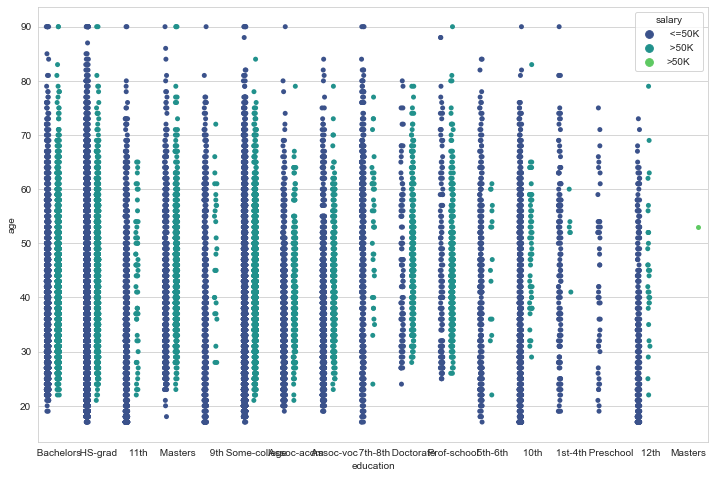

In [11]:
plt.figure(figsize=(12,8))
sns.stripplot(x='education', y='age', data=df, jitter=True, hue='salary', dodge=True, palette='viridis')

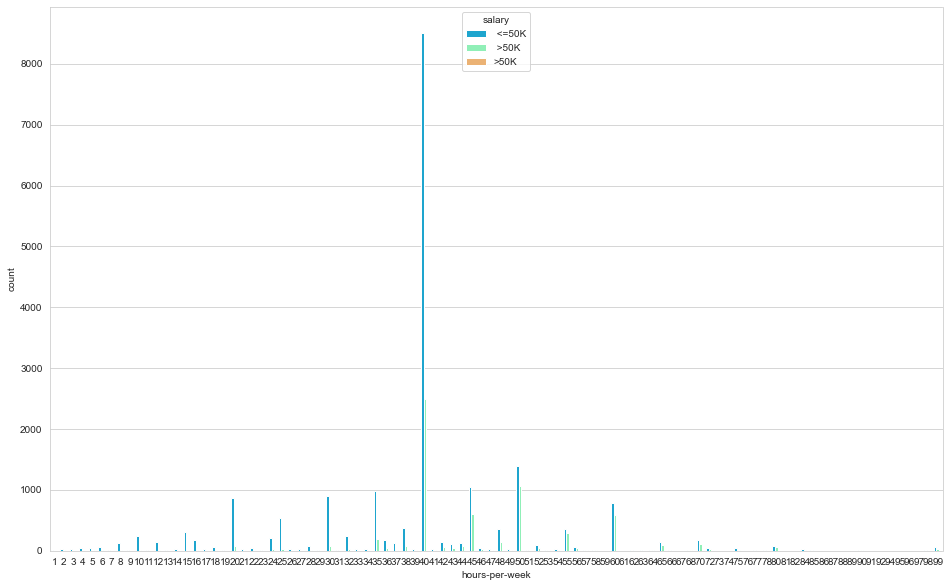

In [12]:
plt.figure(figsize=(16,10))
sns.countplot(x='hours-per-week',data=df, palette='rainbow',hue='salary')
plt.show()

## FIND OUTLIERS     


## outlier plots 

<AxesSubplot:>

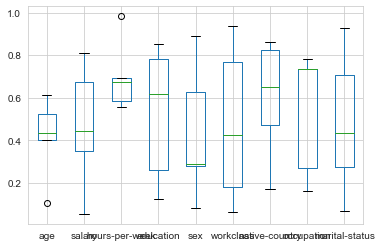

In [13]:
newDf = pd.DataFrame(data = np.random.random(size = (5,9)), columns =['age','salary','hours-per-week', 'education','sex','workclass','native-country','occupation','marital-status'])
newDf.boxplot()

In [14]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
print(df)

       age      workclass      education       marital-status  \
0       39      State-gov      Bachelors        Never-married   
1       50       self-emp      Bachelors   Married-civ-spouse   
2       38        Private        HS-grad             Divorced   
3       53        Private           11th   Married-civ-spouse   
4       28        Private      Bachelors   Married-civ-spouse   
...    ...            ...            ...                  ...   
32555   22        Private   Some-college        Never-married   
32556   27        Private     Assoc-acdm   Married-civ-spouse   
32558   58        Private        HS-grad              Widowed   
32560   52   Self-emp-inc        HS-grad   Married-civ-spouse   
32561   53        Private        Masters              Married   

                           occupation      sex  hours-per-week native-country  \
0          Android Developer - Intern     Male              40         Uganda   
1      Android Developer - Contractor     Male           

In [15]:
df.dropna()

,age,workclass,education,marital-status,occupation,sex,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Never-married,Android Developer - Intern,Male,40,Uganda,<=50K
1,50,self-emp,Bachelors,Married-civ-spouse,Android Developer - Contractor,Male,13,Uganda,<=50K
2,38,Private,HS-grad,Divorced,Android Developer Contractor,Male,40,Uganda,<=50K
3,53,Private,11th,Married-civ-spouse,Senior Android Developer,Male,40,Uganda,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Android Software Engineer,Female,40,Tanzania,<=50K
...,...,...,...,...,...,...,...,...,...
32555,22,Private,Some-college,Never-married,Protective-serv,Male,40,Uganda,<=50K
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Female,38,Uganda,<=50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,Female,40,Uganda,<=50K
32560,52,Self-emp-inc,HS-grad,Married-civ-spouse,Exec-managerial,Female,40,Uganda,>50K


In [16]:
df.isnull().values.any()

False

In [17]:
df.isnull().sum().sum()

0

In [18]:
df.dropna(how = 'all')

,age,workclass,education,marital-status,occupation,sex,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Never-married,Android Developer - Intern,Male,40,Uganda,<=50K
1,50,self-emp,Bachelors,Married-civ-spouse,Android Developer - Contractor,Male,13,Uganda,<=50K
2,38,Private,HS-grad,Divorced,Android Developer Contractor,Male,40,Uganda,<=50K
3,53,Private,11th,Married-civ-spouse,Senior Android Developer,Male,40,Uganda,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Android Software Engineer,Female,40,Tanzania,<=50K
...,...,...,...,...,...,...,...,...,...
32555,22,Private,Some-college,Never-married,Protective-serv,Male,40,Uganda,<=50K
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Female,38,Uganda,<=50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,Female,40,Uganda,<=50K
32560,52,Self-emp-inc,HS-grad,Married-civ-spouse,Exec-managerial,Female,40,Uganda,>50K


In [19]:
df.head()

,age,workclass,education,marital-status,occupation,sex,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Never-married,Android Developer - Intern,Male,40,Uganda,<=50K
1,50,self-emp,Bachelors,Married-civ-spouse,Android Developer - Contractor,Male,13,Uganda,<=50K
2,38,Private,HS-grad,Divorced,Android Developer Contractor,Male,40,Uganda,<=50K
3,53,Private,11th,Married-civ-spouse,Senior Android Developer,Male,40,Uganda,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Android Software Engineer,Female,40,Tanzania,<=50K


In [20]:
df['salary'] = df['salary'].map({' <=50K': 0, '>50K':1, ' >50K':1})
df

,age,workclass,education,marital-status,occupation,sex,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Never-married,Android Developer - Intern,Male,40,Uganda,0
1,50,self-emp,Bachelors,Married-civ-spouse,Android Developer - Contractor,Male,13,Uganda,0
2,38,Private,HS-grad,Divorced,Android Developer Contractor,Male,40,Uganda,0
3,53,Private,11th,Married-civ-spouse,Senior Android Developer,Male,40,Uganda,0
4,28,Private,Bachelors,Married-civ-spouse,Android Software Engineer,Female,40,Tanzania,0
...,...,...,...,...,...,...,...,...,...
32555,22,Private,Some-college,Never-married,Protective-serv,Male,40,Uganda,0
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Female,38,Uganda,0
32558,58,Private,HS-grad,Widowed,Adm-clerical,Female,40,Uganda,0
32560,52,Self-emp-inc,HS-grad,Married-civ-spouse,Exec-managerial,Female,40,Uganda,1


In [21]:
df['salary'].unique()

array([0, 1], dtype=int64)

## Heat Maps

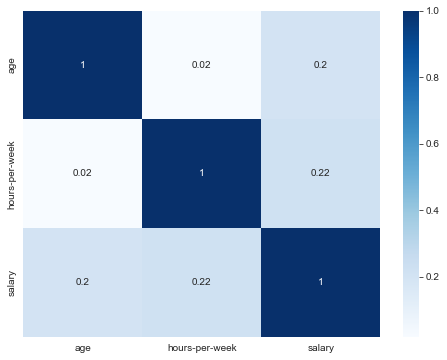

In [22]:
df['age_education'] = df['age'] * df['education']
#df['education_hours'] = df['education'] * df['hours-per-week']
correlation = df.corr().round(2)
plt.figure(figsize = (8,6))
sns.heatmap(correlation, annot = True, cmap = 'Blues')
plt.show()

## correlation matrices

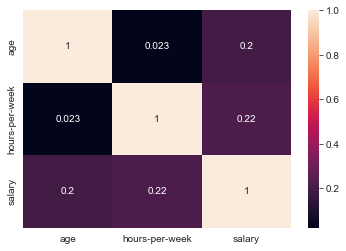

In [23]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)

plt.show()

## Feature Independence plots 

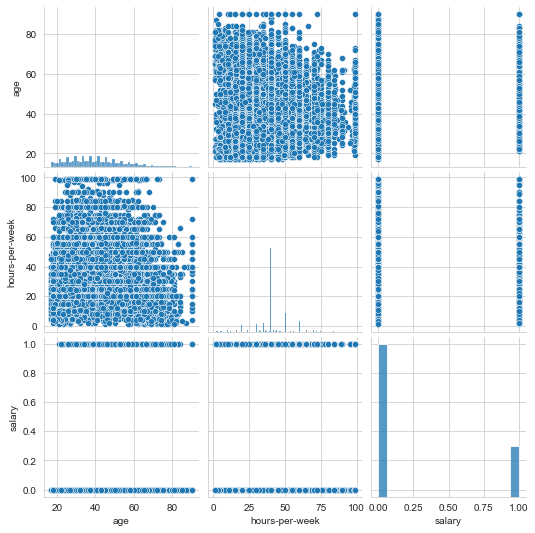

In [24]:
sns.pairplot(df)
plt.show()


## Trends in time and space

In [25]:
from datetime import datetime 
df['hour-per-week'] = pd.to_datetime(df['salary'])
df.head()

,age,workclass,education,marital-status,occupation,sex,hours-per-week,native-country,salary,age_education,hour-per-week
0,39,State-gov,Bachelors,Never-married,Android Developer - Intern,Male,40,Uganda,0,Bachelors Bachelors Bachelors Bachelors Bache...,1970-01-01
1,50,self-emp,Bachelors,Married-civ-spouse,Android Developer - Contractor,Male,13,Uganda,0,Bachelors Bachelors Bachelors Bachelors Bache...,1970-01-01
2,38,Private,HS-grad,Divorced,Android Developer Contractor,Male,40,Uganda,0,HS-grad HS-grad HS-grad HS-grad HS-grad HS-gr...,1970-01-01
3,53,Private,11th,Married-civ-spouse,Senior Android Developer,Male,40,Uganda,0,11th 11th 11th 11th 11th 11th 11th 11th 11th ...,1970-01-01
4,28,Private,Bachelors,Married-civ-spouse,Android Software Engineer,Female,40,Tanzania,0,Bachelors Bachelors Bachelors Bachelors Bache...,1970-01-01


##  Split data into train, validation and test sets

In [26]:
yData = df['salary']
xData = df[[column for column in df if column != "salary"]]

In [27]:
xData.head()

,age,workclass,education,marital-status,occupation,sex,hours-per-week,native-country,age_education,hour-per-week
0,39,State-gov,Bachelors,Never-married,Android Developer - Intern,Male,40,Uganda,Bachelors Bachelors Bachelors Bachelors Bache...,1970-01-01
1,50,self-emp,Bachelors,Married-civ-spouse,Android Developer - Contractor,Male,13,Uganda,Bachelors Bachelors Bachelors Bachelors Bache...,1970-01-01
2,38,Private,HS-grad,Divorced,Android Developer Contractor,Male,40,Uganda,HS-grad HS-grad HS-grad HS-grad HS-grad HS-gr...,1970-01-01
3,53,Private,11th,Married-civ-spouse,Senior Android Developer,Male,40,Uganda,11th 11th 11th 11th 11th 11th 11th 11th 11th ...,1970-01-01
4,28,Private,Bachelors,Married-civ-spouse,Android Software Engineer,Female,40,Tanzania,Bachelors Bachelors Bachelors Bachelors Bache...,1970-01-01


<AxesSubplot:xlabel='salary'>

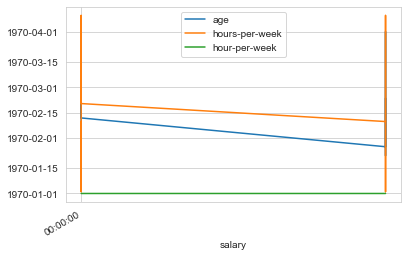

In [28]:
df['salary'] = pd.to_datetime(df['salary'])
 

df= df.set_index('salary')
 

df.plot()

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
encoder = LabelEncoder()

In [31]:
for column in xData:
    encoded = encoder.fit_transform(xData[column])
    xData[column] = encoded

In [32]:
xData.head()

,age,workclass,education,marital-status,occupation,sex,hours-per-week,native-country,age_education,hour-per-week
0,22,6,9,4,44,1,39,39,570,0
1,33,8,9,2,43,1,12,39,581,0
2,21,4,11,0,45,1,39,39,689,0
3,36,4,1,2,696,1,39,39,100,0
4,11,4,9,2,64,0,39,36,559,0


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(xData, yData,
    test_size=0.1, shuffle = True, random_state = 42)

# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
    test_size=0.1, random_state= 42) 


print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(y_train.shape))
print("y val shape: {}".format(y_test.shape))


X_train shape: (21704, 10)
X_test shape: (2680, 10)
y_train shape: (21704,)
y_test shape: (2680,)
X_val shape: (21704,)
y val shape: (2680,)


## Fit any one initial model of your choice  

In [34]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [35]:
y_r_train_pred = lr.predict(X_train)
y_r_test_pred = lr.predict(X_test)

## Evaluate on validation set  

In [36]:
lr.score(X_val, y_val)

1.0

In [37]:
lr.score(X_train, y_train)

1.0